# Dependencies installation

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install yellowbrick
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install numpy
!pip install Jinja2


# Data importation and cleaning

In [2]:
import pandas as pd

# Carga el archivo tabulado como DataFrame
df = pd.read_csv('sporulation-filtered.txt', sep='\t',decimal=',')

#quitamos mean y variacion
df = df[0:-2]
y = df['Genes']
x = df.drop('Genes',axis=1)

# Mostrar las primeras filas del DataFrame
print(x)
print(y)

           t0      t0,5        t2        t5        t7        t9     t11,5
0    1.163781 -1.758143 -0.314950  0.283874 -0.677900  0.470183  0.833156
1    0.955552 -1.489560 -0.499057 -0.099143 -0.674453  1.414381  0.392280
2    1.454598 -0.735149 -0.073602 -0.618896 -0.789697  1.391507 -0.628760
3    1.698578 -1.268638 -0.375511  0.996817 -0.319158 -0.344837 -0.387251
4    1.302831 -1.338633 -0.555163 -0.101402 -0.674167  1.317301  0.049233
..        ...       ...       ...       ...       ...       ...       ...
469  1.473570 -0.980588  0.187547 -0.775976 -1.067287  0.126038  1.036696
470  1.543327 -1.090000 -0.374713 -0.780946 -0.671057  0.308319  1.065071
471  1.855230 -0.550056 -0.264951 -1.042622 -0.729874 -0.019525  0.751798
472  1.785611 -0.406223 -0.895333 -0.585125 -0.816870  0.003997  0.913943
473  1.552631 -0.019515 -0.392120 -1.218152 -0.896972 -0.092712  1.066840

[474 rows x 7 columns]
0      YAL025C
1      YAL036C
2      YAL040C
3      YDL037c
4      YDR184C
        ...  

# Normalization

In [3]:
import pandas as pd

# Supongamos que ya has cargado tu DataFrame y que `x` es tu matriz de expresión
# Normalizar usando Z-score
x_normalized = (x - x.mean(axis=1).values[:, None]) / x.std(axis=1).values[:, None]

# Mostrar las primeras filas del DataFrame normalizado
print(x_normalized.head())

# Si necesitas concatenar los nombres de los genes de nuevo, puedes hacerlo así:
df = pd.DataFrame(x_normalized, columns=x.columns)
df['Genes'] = y.values  # Añadir la columna de genes

# Mostrar el DataFrame normalizado
print(df.head())


         t0      t0,5        t2        t5        t7        t9     t11,5
0  1.163781 -1.758143 -0.314950  0.283874 -0.677900  0.470183  0.833156
1  0.955552 -1.489560 -0.499057 -0.099143 -0.674453  1.414381  0.392280
2  1.454598 -0.735149 -0.073602 -0.618896 -0.789697  1.391507 -0.628760
3  1.698578 -1.268638 -0.375511  0.996817 -0.319158 -0.344837 -0.387251
4  1.302831 -1.338633 -0.555163 -0.101402 -0.674167  1.317301  0.049233
         t0      t0,5        t2        t5        t7        t9     t11,5  \
0  1.163781 -1.758143 -0.314950  0.283874 -0.677900  0.470183  0.833156   
1  0.955552 -1.489560 -0.499057 -0.099143 -0.674453  1.414381  0.392280   
2  1.454598 -0.735149 -0.073602 -0.618896 -0.789697  1.391507 -0.628760   
3  1.698578 -1.268638 -0.375511  0.996817 -0.319158 -0.344837 -0.387251   
4  1.302831 -1.338633 -0.555163 -0.101402 -0.674167  1.317301  0.049233   

     Genes  
0  YAL025C  
1  YAL036C  
2  YAL040C  
3  YDL037c  
4  YDR184C  


# Elbow method

Now we employ the Elbow Method to identify the optimal number of clusters, k, for the k-Means algorithm.
The Elbow Method is a well-established technique used to determine the appropriate number of clusters by
evaluating the within-cluster sum of squares (also known as inertia) for a range of cluster values.

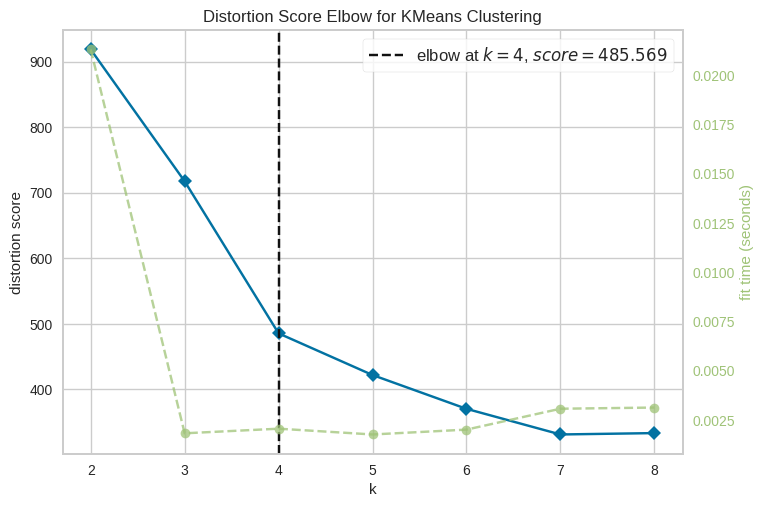

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9)) # a range of k values from 2 to 9

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Data visualization

## PCA

PCA is applied to the gene expression dataset to reduce its dimensionality from the original high dimensional space to two dimensions. By creating an instance of the PCA class with n_components=2,
the code in listing 2 captures the most significant variance in the data while transforming it into a lowerdimensional representation. In this process, PCA identifies the directions (principal components) that maximize the variance of the data.


/tmp/ipykernel_8025/1290411558.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap=plt.cm.Set1, edgecolor="k")


Text(0, 0.5, 'Second principal component')

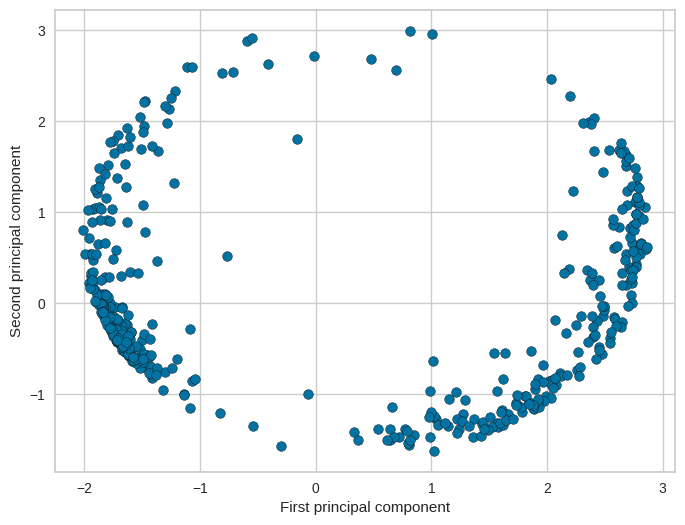

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap=plt.cm.Set1, edgecolor="k")
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The visualization above illustrates the clusters formed by K-means, with different colors representing
different clusters. Additionally, the red circles indicate the centers of the clusters, providing insight into the
central tendencies of the identified groups. This approach allows for a clearer understanding of how gene
expression profiles are organized and related during the sporulation process.

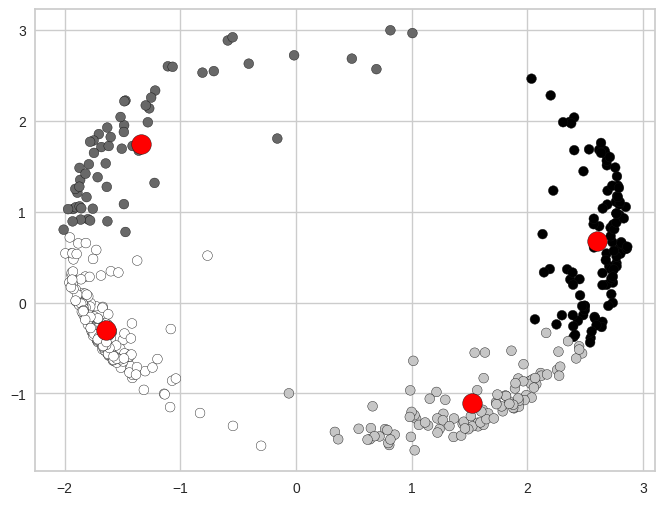

In [6]:
clusterer = KMeans(n_clusters=4)
cluster_labels = clusterer.fit_predict(x_pca)
# show the actual clusters formed and centroids
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusterer.labels_, edgecolor="k")
# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw red circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="red", s=200, edgecolor="k")

## MDS

MDS is also used for dimensionality reduction and, like PCA, aims to preserve the
structure of the data in a lower-dimensional space. MDS starts with a dissimilarity matrix between the
data points and seeks a two-dimensional representation that minimizes the differences between the original
distances and the distances in the reduced space. This focus on dissimilarities makes MDS particularly
advantageous for clustering applications, as it can identify patterns and groupings based on the relationships
between data points rather than solely relying on variance, as is the case with PCA.

/tmp/ipykernel_8025/1610338446.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_mds[:, 0], x_mds[:, 1], cmap=plt.cm.Set1, edgecolor="k")


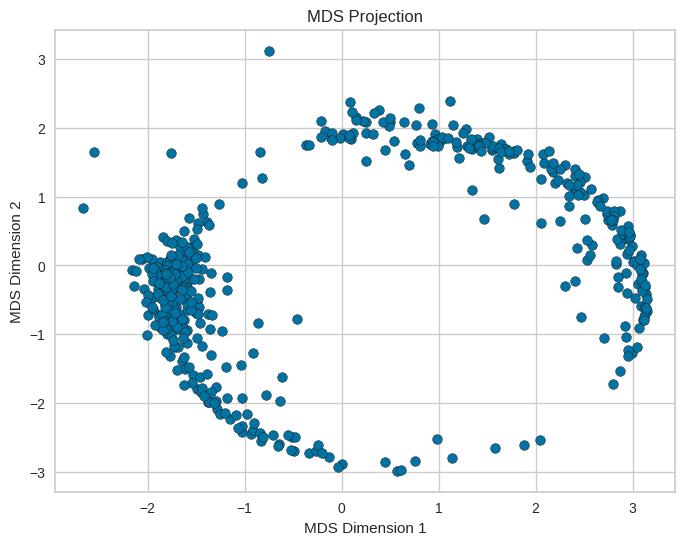

In [7]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el modelo MDS
mds = MDS(n_components=2, random_state=42)
x_mds = mds.fit_transform(x)

# Graficar el resultado
plt.figure(figsize=(8, 6))
plt.clf()
plt.scatter(x_mds[:, 0], x_mds[:, 1], cmap=plt.cm.Set1, edgecolor="k")
# plt.scatter(x_mds[:, 0], x_mds[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("MDS Projection")
plt.show()


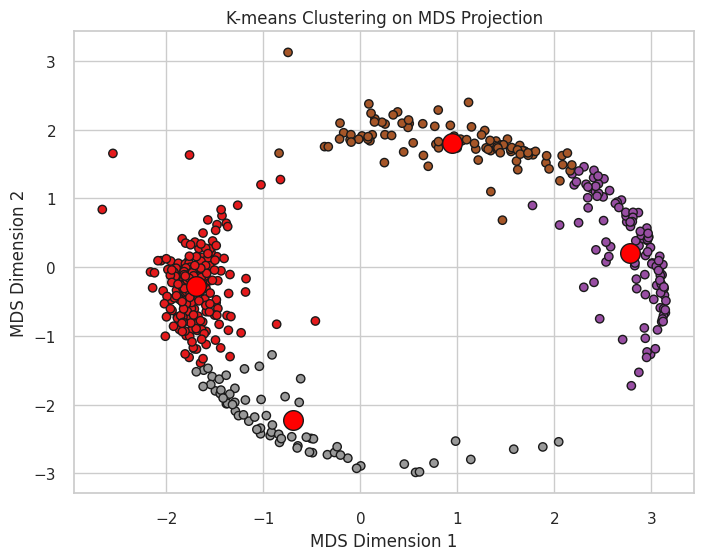

In [13]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar MDS para reducir la dimensionalidad
mds = MDS(n_components=2, random_state=42)
x_mds = mds.fit_transform(x)

# Realizar el clustering con K-means
clusterer = KMeans(n_clusters=4, random_state=42)
cluster_labels = clusterer.fit_predict(x_mds)

# Visualizar los clusters formados
plt.figure(figsize=(8, 6))
plt.clf()
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=cluster_labels, edgecolor="k", cmap=plt.cm.Set1)

# Obtener los centros de los clusters
centers = clusterer.cluster_centers_

# Dibujar círculos rojos en los centros de los clusters
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="red", s=200, edgecolor="k")

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("K-means Clustering on MDS Projection")
plt.show()


To see how every gene is classified in one cluster:

In [8]:
cluster_labels = clusterer.fit_predict(x)
df['cluster'] = cluster_labels
print(df)

           t0      t0,5        t2        t5        t7        t9     t11,5  \
0    1.163781 -1.758143 -0.314950  0.283874 -0.677900  0.470183  0.833156   
1    0.955552 -1.489560 -0.499057 -0.099143 -0.674453  1.414381  0.392280   
2    1.454598 -0.735149 -0.073602 -0.618896 -0.789697  1.391507 -0.628760   
3    1.698578 -1.268638 -0.375511  0.996817 -0.319158 -0.344837 -0.387251   
4    1.302831 -1.338633 -0.555163 -0.101402 -0.674167  1.317301  0.049233   
..        ...       ...       ...       ...       ...       ...       ...   
469  1.473570 -0.980588  0.187547 -0.775976 -1.067287  0.126038  1.036696   
470  1.543327 -1.090000 -0.374713 -0.780946 -0.671057  0.308319  1.065071   
471  1.855230 -0.550056 -0.264951 -1.042622 -0.729874 -0.019525  0.751798   
472  1.785611 -0.406223 -0.895333 -0.585125 -0.816870  0.003997  0.913943   
473  1.552631 -0.019515 -0.392120 -1.218152 -0.896972 -0.092712  1.066840   

       Genes  cluster  
0    YAL025C        2  
1    YAL036C        2  
2  

## Violin plots

Violin plots effectively illustrate the distribution of each variable, enabling us to observe variations in
central tendency and spread across clusters. This visualization is particularly valuable for interpreting how
the characteristics of gene expression profiles differ in relation to the identified clusters over time.

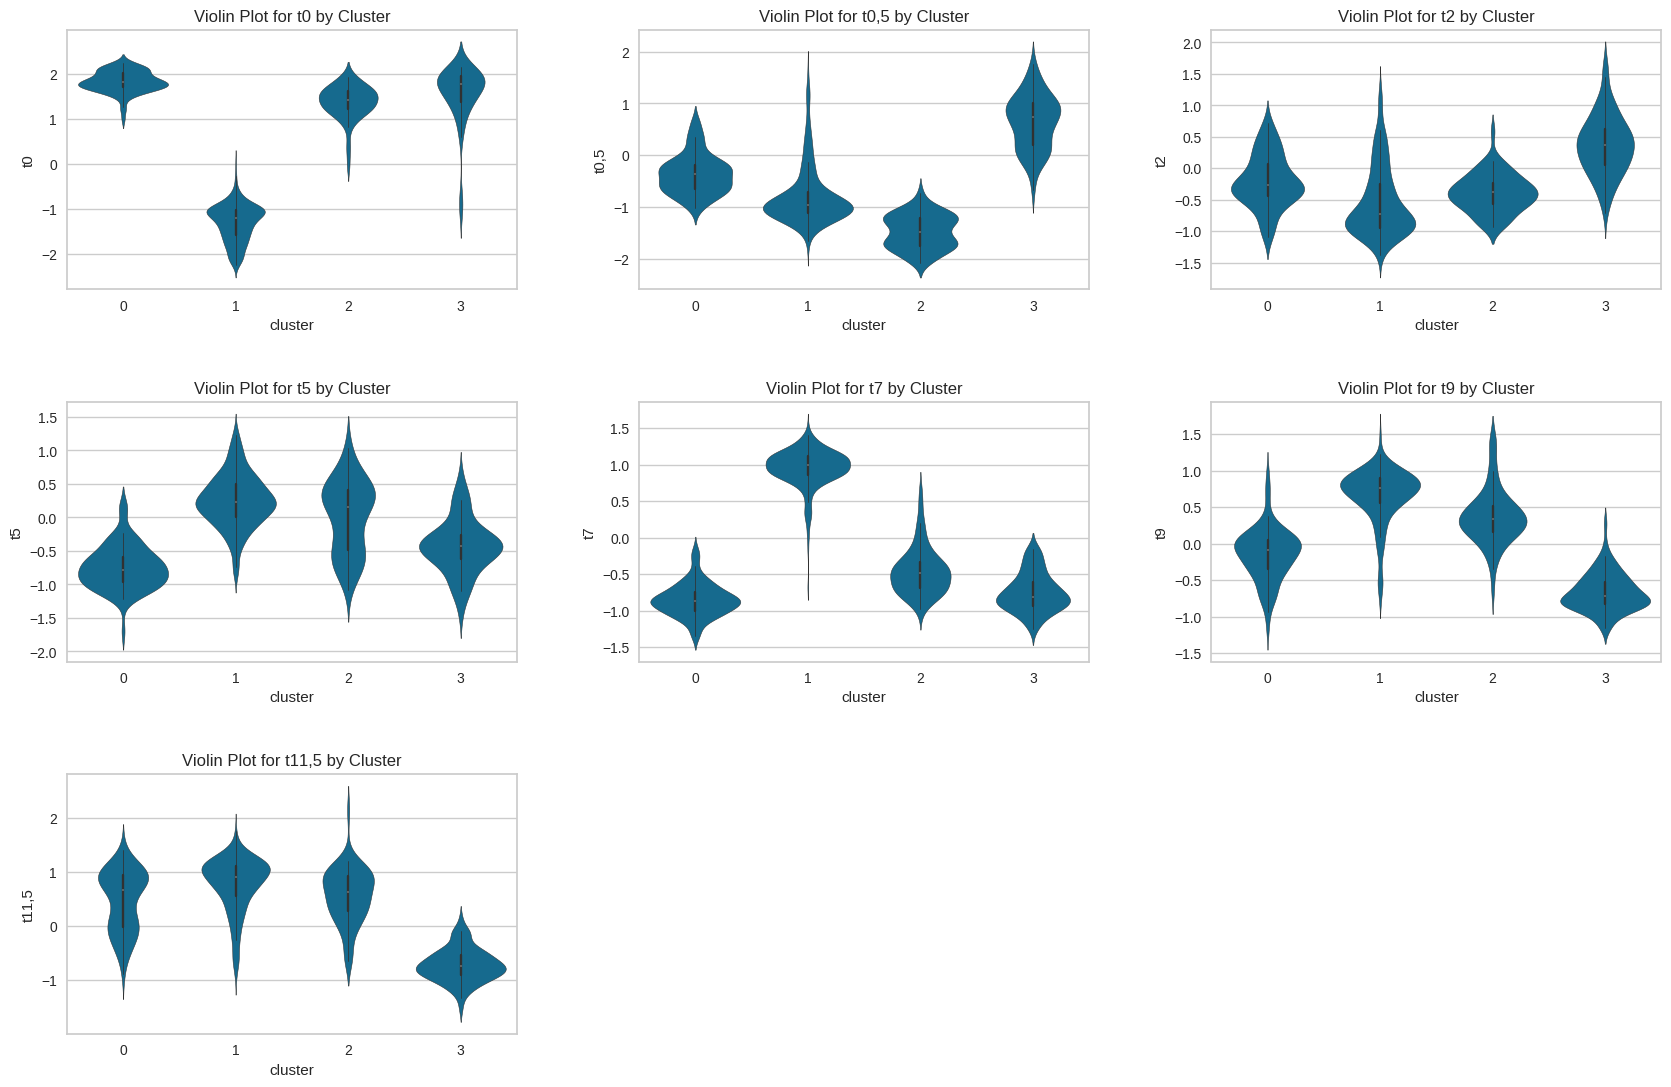

In [9]:
import math
# Número de variables a graficar
num_vars = len(df.columns[1:-1])

# Calcular filas y columnas para los subplots
cols = 3  # Número de gráficos por fila
rows = math.ceil(num_vars / cols)  # Número de filas necesarias

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
fig.tight_layout(pad=5.0)  # Espaciado entre gráficos

# Iterar sobre las variables y graficarlas
for i, var in enumerate(df.columns[0:-1]):
    row = i // cols
    col = i % cols
    sns.violinplot(x=df['cluster'], y=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Violin Plot for {var} by Cluster')

# Eliminar ejes vacíos si hay
for i in range(num_vars, rows * cols):
    fig.delaxes(axes.flat[i])

plt.show()

# Clustering comparation

In this section, we compare various clustering methods (k-means, agglomerative clustering, and Gaussian
mixture models) along with different numbers of clusters. This comparison employs multiple validation
techniques to provide a comprehensive understanding of how well these clustering methods perform on the
dataset.


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Method', 'k', 'Silhouette Score', 'Mean Distance to Centroids', 'Average Distance Between Clusters', 'Non-Overlap Measure'])

# Función para calcular la medida de no solapamiento
def non_overlap_measure(labels):
    unique_labels = np.unique(labels)
    overlap = 0
    for label in unique_labels:
        cluster_points = labels == label
        overlap += np.sum(cluster_points) ** 2
    return overlap

# Lista de métodos de clustering
methods = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'Gaussian Mixture': GaussianMixture
}

# Lista para almacenar los resultados
results_list = []

# Iterar sobre diferentes métodos y valores de k
for method_name, method in methods.items():
    for k in range(2, 15):  # Iniciar en 2 para que el Silhouette tenga sentido
        if method_name == 'KMeans':
            clusterer = method(n_clusters=k, random_state=42)
            cluster_labels = clusterer.fit_predict(x)
            centroids = clusterer.cluster_centers_
        elif method_name == 'Agglomerative':
            clusterer = method(n_clusters=k)
            cluster_labels = clusterer.fit_predict(x)
            centroids = None  # Agglomerative no tiene centroids
        elif method_name == 'Gaussian Mixture':
            clusterer = method(n_components=k, random_state=42)
            cluster_labels = clusterer.fit_predict(x)
            centroids = clusterer.means_

        # Silhouette Score
        silhouette_avg = silhouette_score(x, cluster_labels)

        # Mean Distance to Centroids (solo para métodos con centros)
        if centroids is not None:
            mean_distance = np.mean(np.min(cdist(x, centroids), axis=1))
        else:
            mean_distance = np.nan

        # Average Distance Between Clusters
        avg_distance = 0
        for i in range(k):
            for j in range(i + 1, k):
                avg_distance += np.mean(cdist(x[cluster_labels == i], x[cluster_labels == j]))
        avg_distance /= (k * (k - 1)) / 2  # Promedio total

        # Non-Overlap Measure
        non_overlap = non_overlap_measure(cluster_labels)

        # Almacenar resultados en una lista
        results_list.append({
            'Method': method_name,
            'k': k,
            'Silhouette Score': silhouette_avg,
            'Mean Distance to Centroids': mean_distance,
            'Average Distance Between Clusters': avg_distance,
            'Non-Overlap Measure': non_overlap
        })

# Convertir la lista de resultados a un DataFrame
results = pd.DataFrame(results_list)

# Estilizar la tabla
styled_results = results.style \
    .set_table_attributes('style="width:100%; border-collapse:collapse;"') \
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'}) \
    .background_gradient(cmap='viridis', subset=['Silhouette Score', 'Mean Distance to Centroids', 'Average Distance Between Clusters', 'Non-Overlap Measure']) \
    .highlight_max(color='lightgreen', axis=0, props='text-decoration: underline;') \
    .highlight_min(color='salmon', axis=0) \
    .set_caption("Resultados de Clustering con Distintos Métodos") \
    .set_table_attributes('style="border: 2px solid black; border-collapse: collapse; font-size: 12px; margin: 20px 0;"')

# Guardar la tabla estilizada en HTML
html_table = styled_results.to_html()
with open('clustering_results.html', 'w') as f:
    f.write(html_table)

# Si deseas mostrar la tabla directamente en Jupyter Notebook (si corresponde)
styled_results


,Method,k,Silhouette Score,Mean Distance to Centroids,Average Distance Between Clusters,Non-Overlap Measure
0,KMeans,2,0.573938,1.256553,4.138859,114020
1,KMeans,3,0.510583,1.070448,3.638225,91748
2,KMeans,4,0.466556,0.910456,3.650298,67146
3,KMeans,5,0.451441,0.843737,3.464272,61202
4,KMeans,6,0.424585,0.799745,3.398865,55980
5,KMeans,7,0.270092,0.768112,3.385312,39714
6,KMeans,8,0.247244,0.731416,3.402948,33870
7,KMeans,9,0.228918,0.715297,3.345095,31204
8,KMeans,10,0.228688,0.705044,3.296568,30290
9,KMeans,11,0.232943,0.689685,3.251197,29892


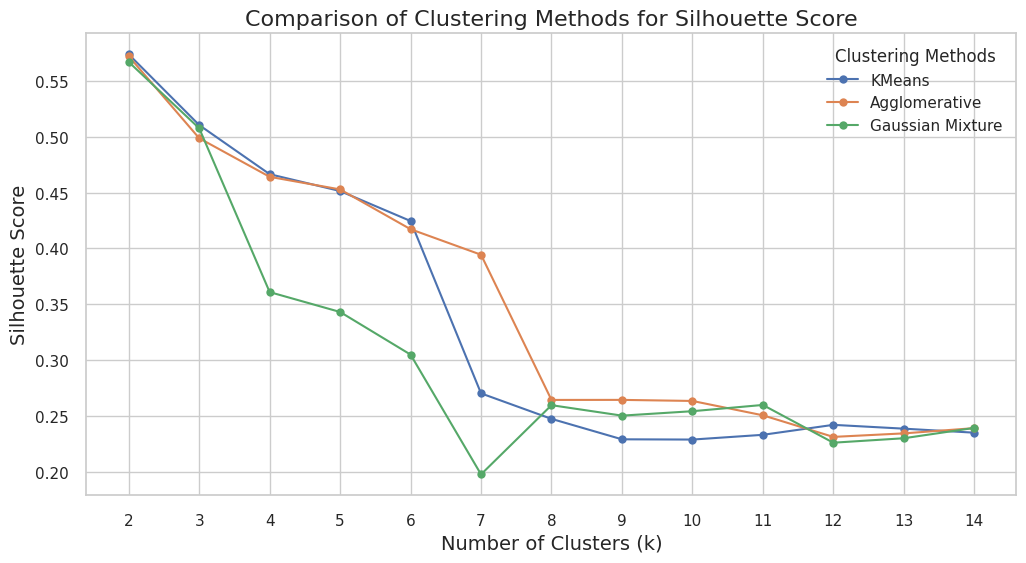

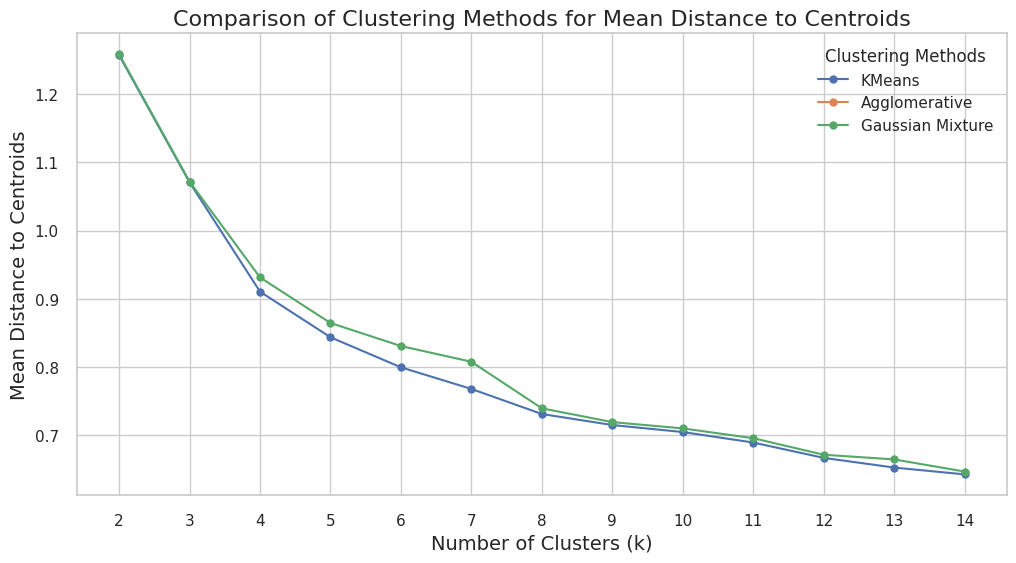

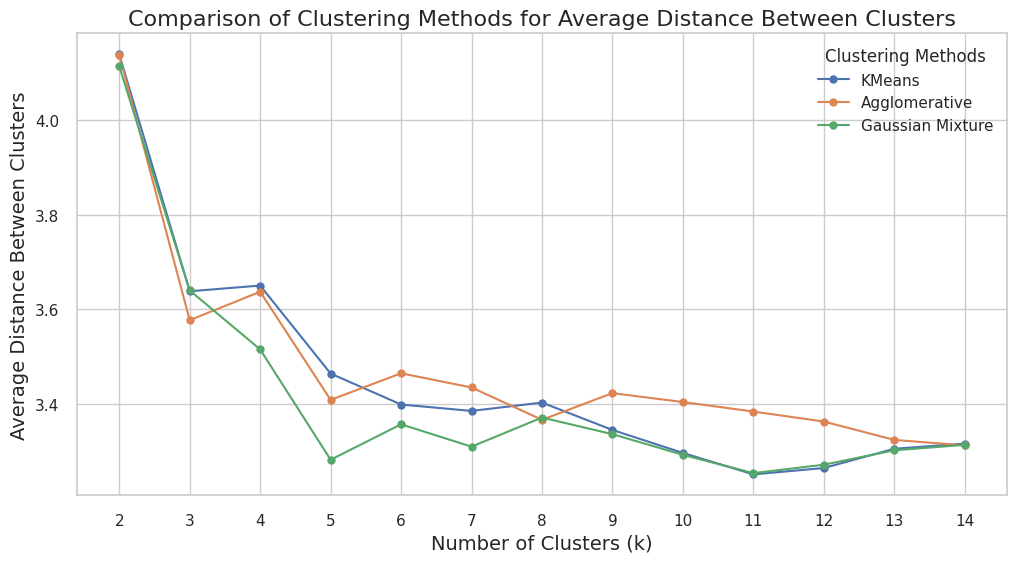

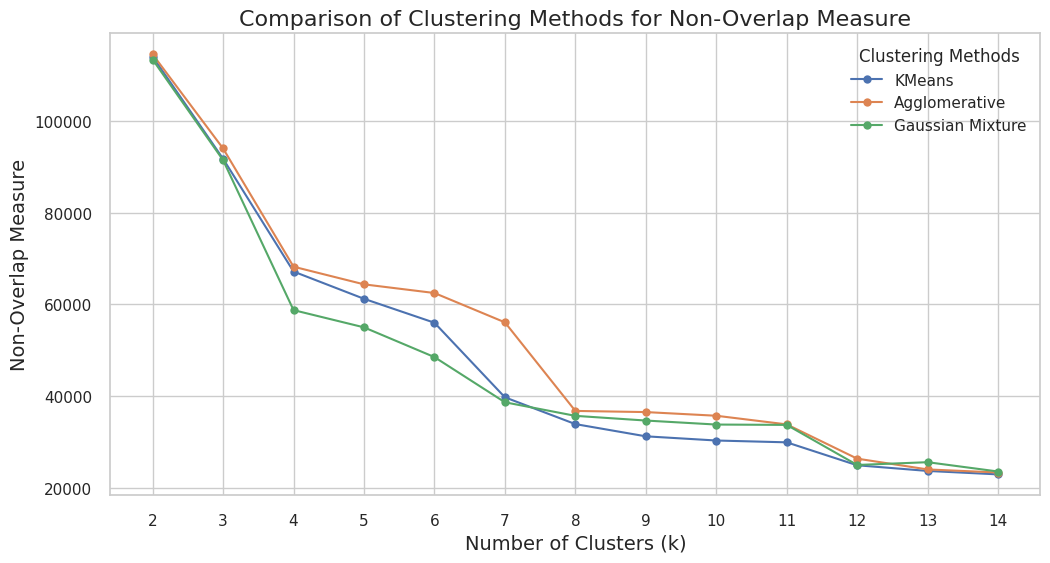

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style='whitegrid')

# Listar métricas a graficar
metrics = ['Silhouette Score', 'Mean Distance to Centroids', 'Average Distance Between Clusters', 'Non-Overlap Measure']

# Crear una gráfica para cada métrica
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # Graficar cada método de clustering
    for method in methods.keys():
        # Filtrar los resultados por método
        method_results = results[results['Method'] == method]

        # Graficar la métrica correspondiente
        plt.plot(method_results['k'], method_results[metric], marker='o', label=method)

    # Configuraciones de la gráfica
    plt.title(f'Comparison of Clustering Methods for {metric}', fontsize=16)
    plt.xlabel('Number of Clusters (k)', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(range(2, 15))
    plt.legend(title='Clustering Methods')
    plt.grid(True)

    # Guardar la gráfica
    plt.savefig(f'clustering_{metric}.png')
    plt.show()


# Silhouettes analysis

Since the results obtained using the previous methods do not fully align with the findings reported in
the literature, we will now apply the silhouette method to analyze our data. This approach will allow us
to evaluate the consistency and quality of our clustering results in a more robust manner. By using the
silhouette method, we aim to gain deeper insights into how well-separated our clusters are, as this metric
considers both the cohesion within clusters and the separation between different clusters. This analysis
should help us better understand the discrepancies between our findings and those reported in the original
article, providing a more thorough validation of our results.

K = 2: Silhouette score promedio = 0.574


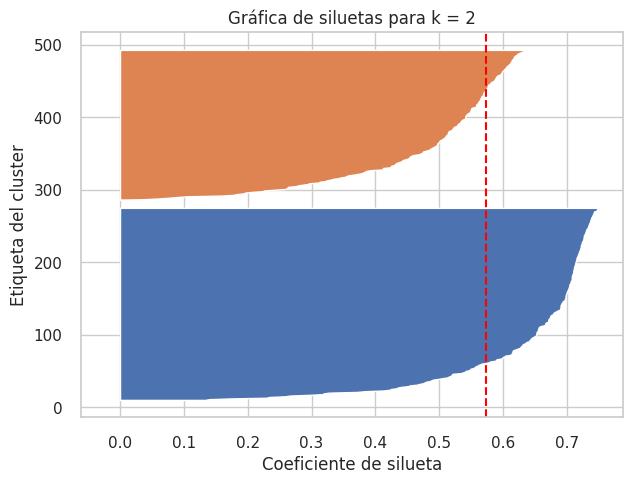

K = 3: Silhouette score promedio = 0.500


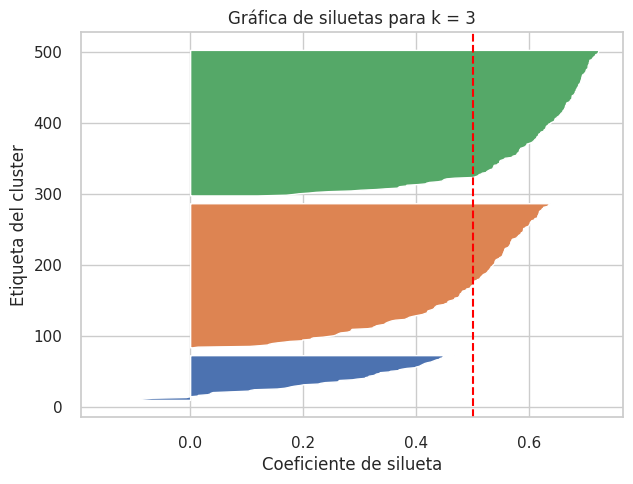

K = 4: Silhouette score promedio = 0.467


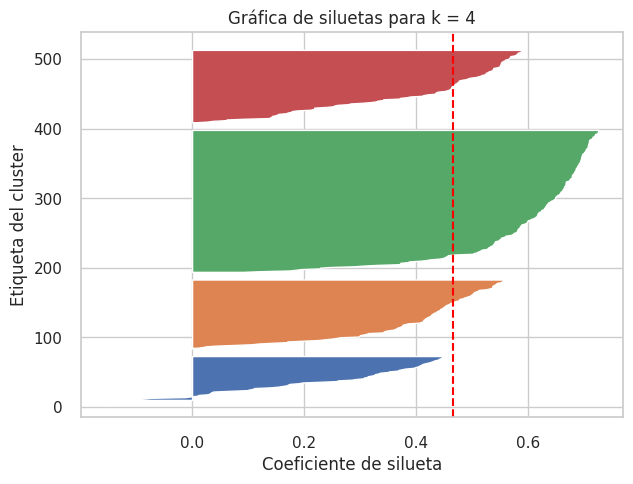

K = 5: Silhouette score promedio = 0.433


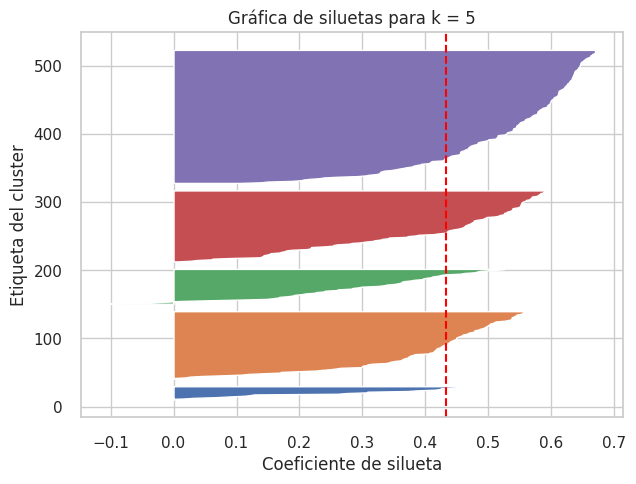

K = 6: Silhouette score promedio = 0.424


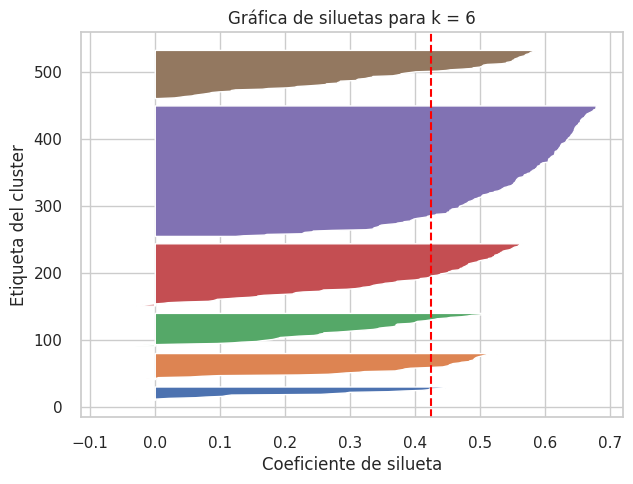

K = 7: Silhouette score promedio = 0.319


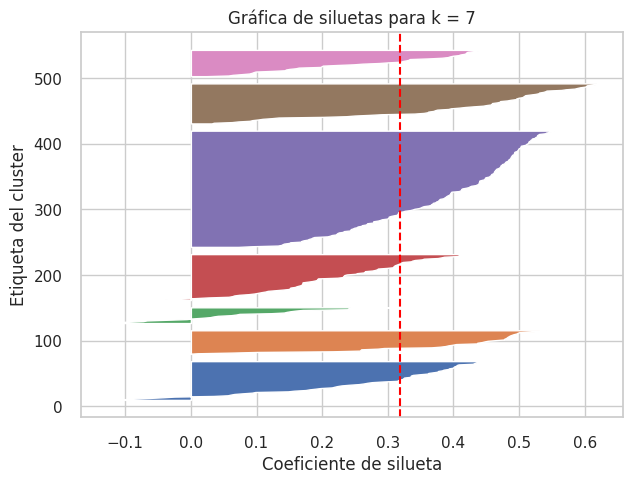

K = 8: Silhouette score promedio = 0.389


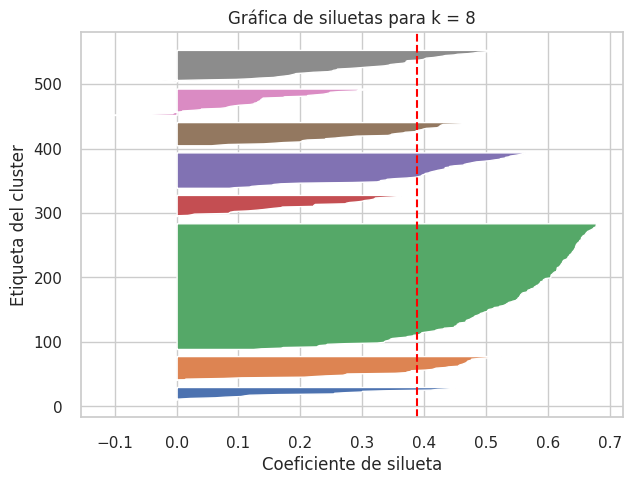

K = 9: Silhouette score promedio = 0.350


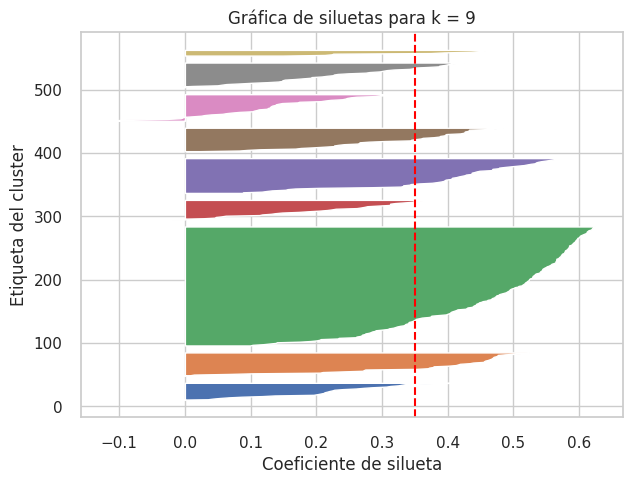

K = 10: Silhouette score promedio = 0.355


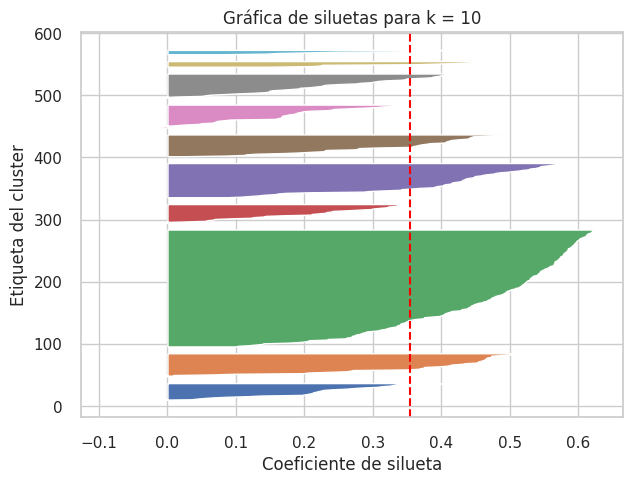

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Crear un rango de valores de k
range_k = range(2, 11)


for k in range_k:
    # Crear el modelo KMeans con el número de clusters k
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(x)

    # Si k es 1, el silhouette score no se puede calcular
    if k == 1:
        print(f"K = {k}: El silhouette score no es aplicable.")
        continue

    # Calcular el promedio del silhouette score para todos los puntos
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"K = {k}: Silhouette score promedio = {silhouette_avg:.3f}")

    # Calcular los valores de silueta para cada punto
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    # Crear el gráfico de siluetas
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    y_lower = 10
    for i in range(k):
        # Agregar los valores de silueta para los clusters en orden
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)

        y_lower = y_upper + 10  # Espacio entre clusters

    # Dibujar la línea del umbral del silhouette score promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_title(f"Gráfica de siluetas para k = {k}")
    ax1.set_xlabel("Coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    plt.show()